# DeepInsight - Test

## Imports

In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install sktime
clear_output()

In [ ]:
!pip -q install git+https://github.com/alok-ai-lab/pyDeepInsight.git#egg=pyDeepInsight
clear_output()

In [ ]:
!pip -q install git+https://github.com/jacobgil/pytorch-grad-cam
clear_output()

In [ ]:
# !pip install torch>=1.2.0
# !pip uninstall torchvision
# !pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
clear_output()

In [ ]:
!pip install torchcam
clear_output()

In [ ]:
!pip install Pillow==8.4.0
clear_output()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sktime.datasets import load_from_tsfile_to_dataframe
from sktime.datasets import load_from_tsfile
from pyDeepInsight import ImageTransformer, LogScaler

import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

## Functions

In [ ]:
def displayImageUniqueValuesMore ( imageArray ):

  print("ImageArray Shape:" , imageArray.shape)
  img2 = imageArray.reshape(-1, imageArray.shape[2]) # reshape the original image into -1, 3; -1 is placeholder, so lets say you have a 
                                                    # numpy array with shape (6,2), if you reshape it to (-1, 3), we know the second dim = 3
                                                    # first dim = (6*2)/3 = 4, so -1 is replaced with 4
  print("ImageReshape Shape:", img2.shape)

  counter = np.unique(img2, axis=0) # find unique elemenst
  '''
  numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)[source]
  Find the unique elements of an array.

  Returns the sorted unique elements of an array. There are three optional outputs in addition to the unique elements:

  the indices of the input array that give the unique values
  the indices of the unique array that reconstruct the input array
  the number of times each unique value comes up in the input array
  '''
  #print("Array of pixels combinations:\n", counter)
  print("Shape of array", counter.shape) # as, we have separate axis, so the channels are shown in dim 2
  print("how many pixels:", counter.shape[0], "or", len(set(imageArray.flatten())))
  
  #binArray=np.bincount(counter.flatten())
  count = 0
  for value in counter:
    print("Value: ", value, "| Occurrences:", (img2 == value).sum())
    count =+ 1
  

In [ ]:
def get_model(width, height, channels):
  model = Sequential()

  model.add(Conv2D(16, (1, 1), activation='relu', input_shape=(width, height, channels)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, (1, 1), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (1, 1), activation='relu'))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.7)) #Aumentar depois maybe o dropout
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.7))
  model.add(Dense(n_classes, activation='softmax'))

  # early stopping
  callback = EarlyStopping(monitor='loss')
  # compile model
  opt = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

## Run code

### Configs

In [ ]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/drive')

In [ ]:
DATA_SET_NAMES = [
"ACSF1",
"Adiac",
"ArrowHead",
"Beef",
"BeetleFly",
"BirdChicken",
"BME",
"Car",
"CBF",
"Chinatown",
"ChlorineConcentration",
"CinCECGTorso",
"Coffee",
"Computers",
"Crop",
"DiatomSizeReduction",
"DistalPhalanxOutlineAgeGroup",
"DistalPhalanxOutlineCorrect",
"DistalPhalanxTW",
"Earthquakes",
"ECG200",
"ECG5000",
"ECGFiveDays",
"ElectricDevices",
"EthanolLevel",
"FaceAll",
"FaceFour",
"FacesUCR",
"FiftyWords",
"Fish",
"FordA",
"FordB",
"FreezerRegularTrain",
"FreezerSmallTrain",
"GunPoint",
"GunPointAgeSpan",
"GunPointMaleVersusFemale",
"GunPointOldVersusYoung",
"Ham",
"Haptics",
"Herring",
"HouseTwenty",
"InlineSkate",
"InsectEPGRegularTrain",
"InsectEPGSmallTrain",
"ItalyPowerDemand",
"LargeKitchenAppliances",
"Lightning2",
"Lightning7",
"Mallat",
"Meat",
"MedicalImages",
"MiddlePhalanxOutlineAgeGroup",
"MiddlePhalanxOutlineCorrect",
"MiddlePhalanxTW",
"MixedShapesRegularTrain",
"MixedShapesSmallTrain",
"MoteStrain",
"OliveOil",
"OSULeaf",
"PhalangesOutlinesCorrect",
"Phoneme",
"PigAirwayPressure",
"PigArtPressure",
"PigCVP",
"Plane",
"ProximalPhalanxOutlineAgeGroup",
"ProximalPhalanxOutlineCorrect",
"ProximalPhalanxTW",
"RefrigerationDevices",
"Rock",
"ScreenType",
"SemgHandGenderCh2",
"SemgHandMovementCh2",
"SemgHandSubjectCh2",
"ShapeletSim",
"ShapesAll",
"SmallKitchenAppliances",
"SmoothSubspace",
"SonyAIBORobotSurface1",
"SonyAIBORobotSurface2",
"StarLightCurves",
"Strawberry",
"SwedishLeaf",
"Symbols",
"SyntheticControl",
"ToeSegmentation1",
"ToeSegmentation2",
"Trace",
"TwoLeadECG",
"TwoPatterns",
"UMD",
"UWaveGestureLibraryAll",
"Wafer",
"Wine",
"WordSynonyms",
"Worms",
"WormsTwoClass",
"Yoga"]

In [ ]:
print(len(DATA_SET_NAMES))
DATA_SET_NAMES.index("FordA")

### Script

In [ ]:
!octave -W add.m

In [ ]:
expr_file = r"./examples/data/tcga.rnaseq_fpkm_uq.example.txt.gz"
expr = pd.read_csv(expr_file, sep="\t")
y = expr['project'].values
X = expr.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)
X_train.shape

In [ ]:
# eng = matlab.engine.start_matlab()
# eng.simple_script(nargout=0)
# eng.quit()

In [ ]:
for name in DATA_SET_NAMES[30:]:

### Test

In [ ]:
dataSet = "ArrowHead"

In [ ]:
x_train, y_train = load_from_tsfile("drive/MyDrive/Tese/Univariate_ts/" + dataSet + "/" + dataSet + "_TRAIN.ts", return_data_type = "numpy2d")
x_test, y_test = load_from_tsfile("drive/MyDrive/Tese/Univariate_ts/" + dataSet + "/" + dataSet + "_TEST.ts", return_data_type = "numpy2d")

In [ ]:
print(x_train.shape, x_test.shape)

(36, 251) (175, 251)


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
ln = LogScaler()
X_train_norm = ln.fit_transform(x_train)
X_test_norm = ln.transform(x_test)

/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:347: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)


In [ ]:
# it = ImageTransformer(feature_extractor='tsne', 
#                       pixels=50, random_state=1701, 
#                       n_jobs=-1)

################################### ONE OR ANOTHER ###########################################
tsne = TSNE(n_components=2, perplexity=30, metric='cosine',
            random_state=1701, n_jobs=-1)

it = ImageTransformer(feature_extractor=tsne, pixels=50)

Train image transformer on training data. Setting plot=True results in at a plot showing the reduced features (blue points), convex full (red), and minimum bounding rectagle (green) prior to rotation.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


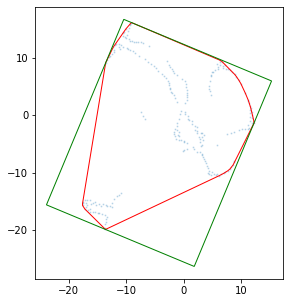

In [ ]:
plt.figure(figsize=(5, 5))
_ = it.fit(X_train_norm, plot=True)

The feature density matrix can be extracted from the trained transformer in order to view overall feature overlap.



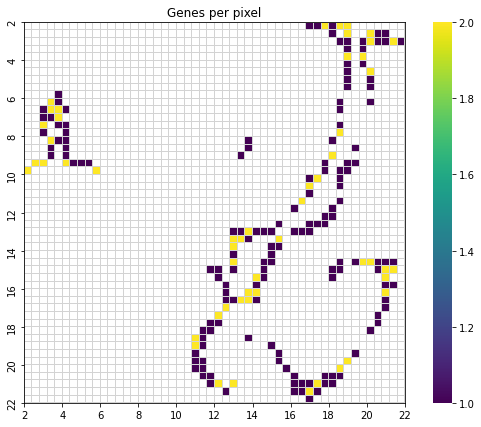

In [ ]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel")

It is possible to update the pixel size without retraining.

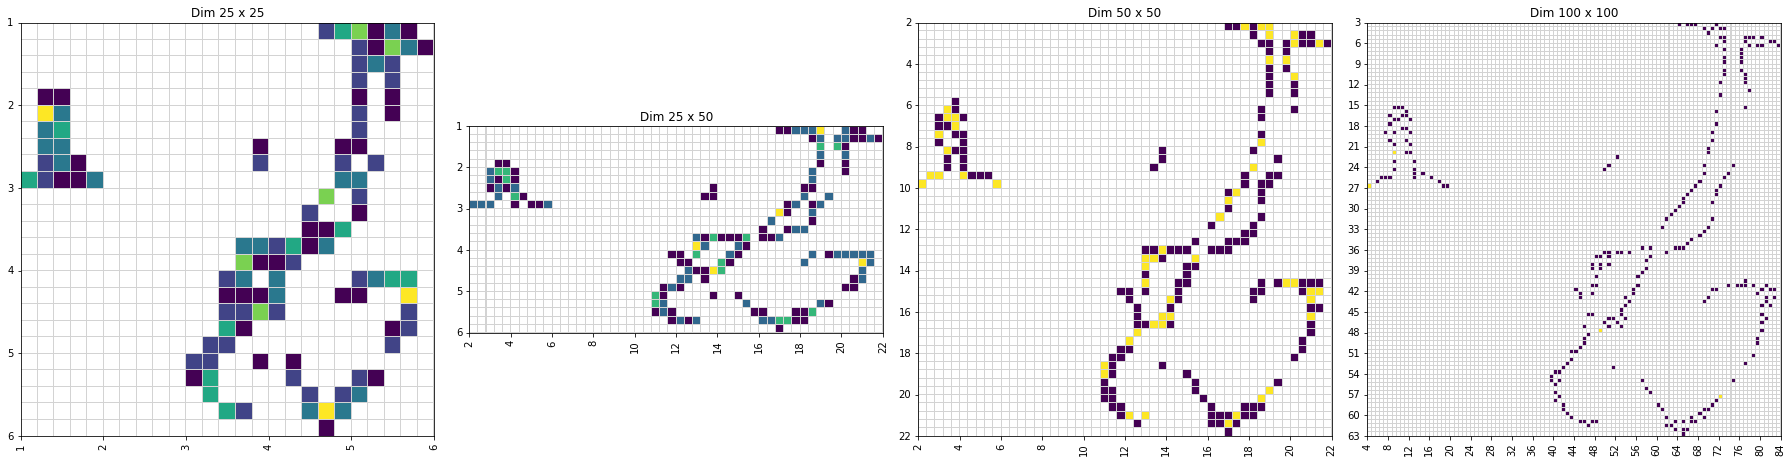

In [ ]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)
    cax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    cax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()    
    
it.pixels = 50

In [ ]:
X_train_img = it.fit_transform(X_train_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Plotting the image matrices first four samples of the training set.

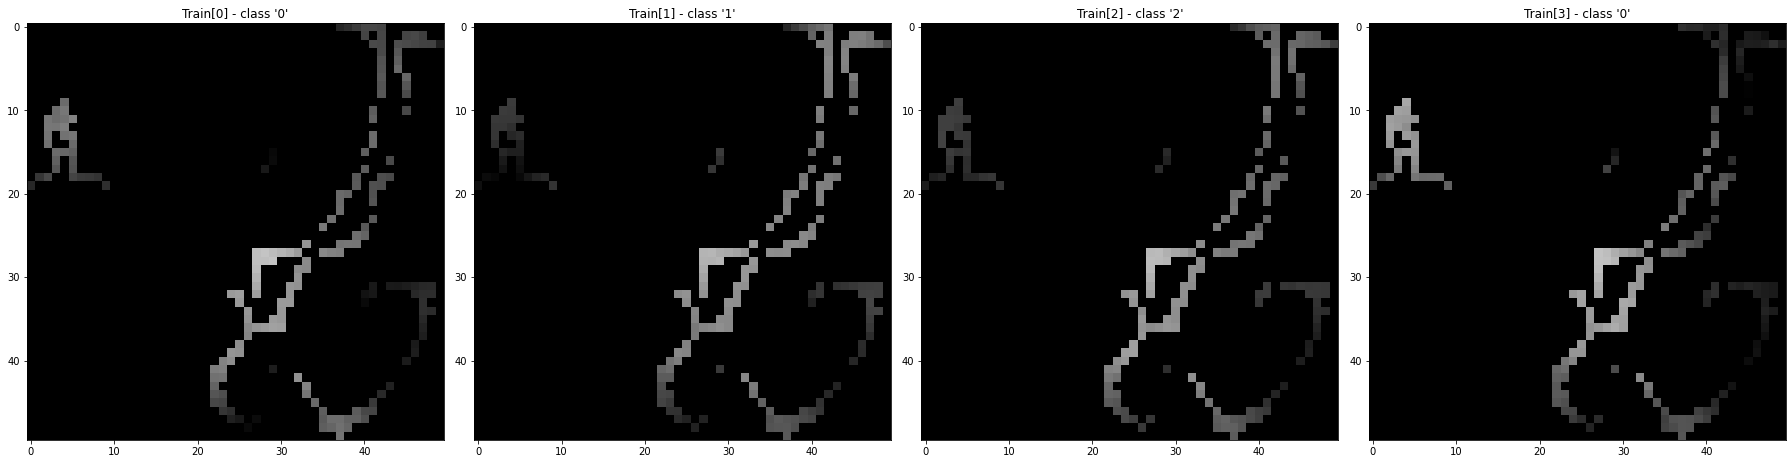

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text("Train[{}] - class '{}'".format(i, y_train[i]))
plt.tight_layout()

Transforming the testing data is done the same as transforming the training data.

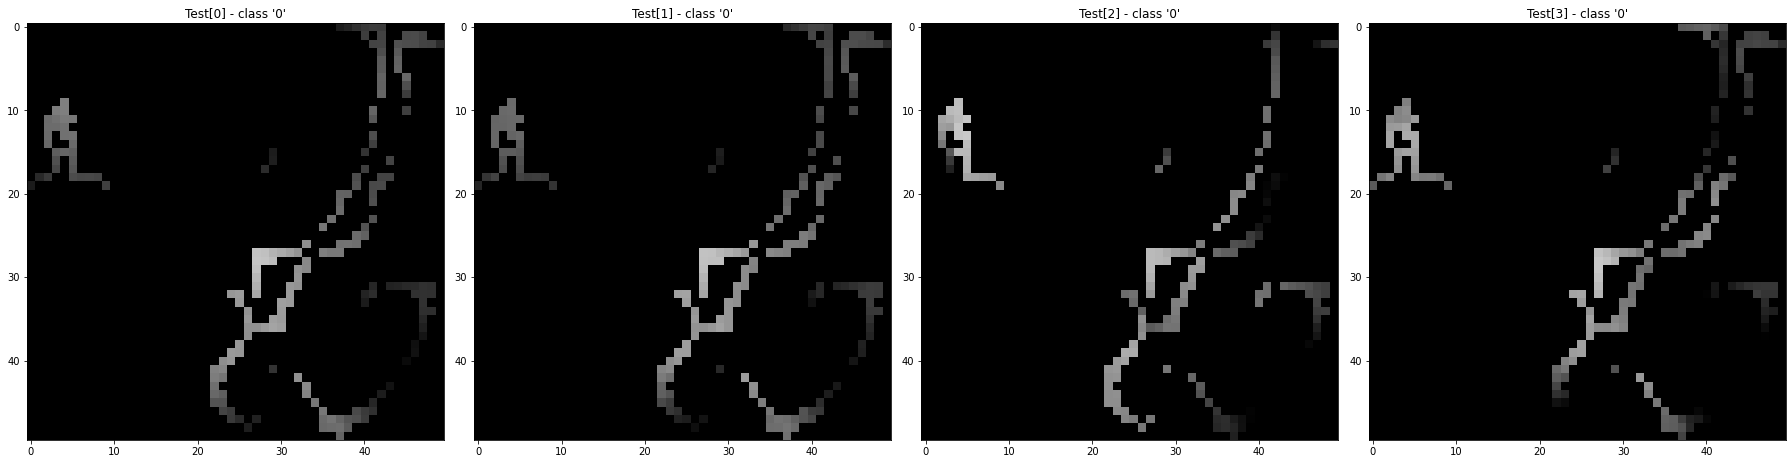

In [ ]:
X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_test_img[i])
    ax[i].title.set_text("Test[{}] - class '{}'".format(i, y_test[i]))
plt.tight_layout()

The image matrices can then be used as input for the CNN model.

In [ ]:
displayImageUniqueValuesMore(X_train_img)

A saída de streaming foi truncada nas últimas 5000 linhas.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.51729273] | Occurrences: 243888
Value:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.52663673] | Occurrences: 243888
Value:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.    

KeyboardInterrupt: ignored

### CNN

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import re 
import math
import gc
import csv
import time

from pathlib import Path 
from zipfile import ZipFile
from PIL import Image
from sktime.datasets import load_from_tsfile_to_dataframe
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [ ]:
train_y = y_train.astype('uint8')
test_y = y_test.astype('uint8')

train_x = X_train_img
test_x = X_test_img

while(min(train_y) > 0):
  train_y = train_y - 1
while(min(test_y) > 0):
  test_y = test_y - 1

n_classes = np.unique(train_y).size
train_length, width, height, channels = train_x.shape[0], train_x.shape[1], train_x.shape[2], train_x.shape[3]

datagen = ImageDataGenerator() # AQUIIIIIIIIIIIIIIII NAO EH PRECISO DE RESCALEEEEEEEEEEEEE

################# TRAINING #################
callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

#Configs
#BATCH_SIZE = 32 if train_length >= 500 else 16 if train_length >= 50 else 8
BATCH_SIZE = 16 if train_length >= 50 else 8
EPOCHS = 300
N_SPLIT = 5
verbose = 1
# Storing the average of all predictions
main_pred = []
data_kfold = pd.DataFrame()
acc_per_fold = []
loss_per_fold = []

kfold = KFold(n_splits=N_SPLIT, shuffle=True)
fold_no = 0

for train_idx, val_idx in list(kfold.split(train_x, train_y)):

  fold_no+=1
  training_set = datagen.flow(train_x[train_idx], train_y[train_idx], batch_size=BATCH_SIZE)
  
  validation_set = datagen.flow(train_x[val_idx], train_y[val_idx], batch_size=BATCH_SIZE)
  model_test = get_model(width, height, channels)
  history = model_test.fit( training_set,
                            validation_data=validation_set,
                            epochs = EPOCHS,
                            steps_per_epoch = len(training_set) ,
                            callbacks = callbacks,
                            verbose = verbose
                            )
  
  del(training_set)
  del(validation_set)

  test_set = datagen.flow(test_x, test_y, batch_size=BATCH_SIZE)
  pred = model_test.evaluate(test_set, steps=len(test_set))

  del(test_set)

  print(f'Score for fold {fold_no}: {model_test.metrics_names[0]} of {pred[0]}; {model_test.metrics_names[1]} of {pred[1]*100}%')
  
  acc_per_fold.append(pred[1])
  loss_per_fold.append(pred[0])

  gc.collect()


  ################# OUTPUT #################


  # == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i] * 100}%')

print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold) * 100} (+- {np.std(acc_per_fold) * 100})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/300
4/4 [==============================] - 1s 64ms/step - loss: 1.1409 - accuracy: 0.2500 - val_loss: 1.1025 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 2/300
4/4 [==============================] - 0s 17ms/step - loss: 1.1120 - accuracy: 0.2500 - val_loss: 1.0977 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 3/300
4/4 [==============================] - 0s 19ms/step - loss: 1.1438 - accuracy: 0.3214 - val_loss: 1.0967 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 4/300
4/4 [==============================] - 0s 18ms/step - loss: 1.1317 - accuracy: 0.2500 - val_loss: 1.0934 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 5/300
4/4 [==============================] - 0s 17ms/step - loss: 1.1065 - accuracy: 0.3929 - val_loss: 1.0898 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 6/300
4/4 [==============================] - 0s 17ms/step - loss: 1.1102 - accuracy: 0.3571 - val_loss: 1.0865 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 7/300
4/4 [==============================] - 0s 16ms

# Save Images

# DeepInsight - Save images


## Imports

In [ ]:
from IPython.display import clear_output
!pip install sktime
clear_output()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib
import os
import gc
import PIL
import matplotlib.image as mpimg
 

from PIL import Image
from sktime.datatypes._panel._convert import from_nested_to_2d_np_array
from sktime.datasets import load_from_tsfile_to_dataframe


In [ ]:
#!pip install -U pillow

## Functions

In [ ]:
def datasetToDeepInsight ( 
    datasetTrain,
    datasetTest,
    name = "",
    path = ""
  ): 

  trainOrTest = "TRAIN"

  #Configurations
  #figF, axF = plt.subplots(figsize=(6,4))
  #axF.set_axis_off()

  ln = LogScaler()
  X_train_norm = ln.fit_transform(datasetTrain)
  X_test_norm = ln.transform(datasetTest)

  tsne = TSNE(n_components=2, perplexity=30, metric='cosine', random_state=1701, n_jobs=-1)
  it = ImageTransformer(feature_extractor=tsne, pixels=50)

  X_train_img = it.fit_transform(X_train_norm)
  X_test_img = it.transform(X_test_norm)

  for count, timeseriesImage in enumerate(X_train_img):

    if not os.path.exists( path + "/" + name + "/" + trainOrTest ):
      os.makedirs( path + "/" + name + "/" + trainOrTest )

    pathImage = path + "/" + name + "/" + trainOrTest + "/" + name + str(count) +  ".png"
    mpimg.imsave(pathImage,timeseriesImage) 

    gc.collect()

  trainOrTest = "TEST"
  for count, timeseriesImage in enumerate(X_test_img):

    #print(timeseriesImage.shape)

    #axF.imshow(timeseriesImage)
    ############################################# Images
    #Create and save images in directory

    if not os.path.exists( path + "/" + name + "/" + trainOrTest ):
      os.makedirs( path + "/" + name + "/" + trainOrTest )

    #print(1)
    #figF.canvas.draw()
    #print(2)
    #img = Image.frombytes('RGB', figF.canvas.get_width_height(), figF.canvas.tostring_rgb())
    #print(3)

    pathImage = path + "/" + name + "/" + trainOrTest + "/" + name + str(count) +  ".png"
    #print(pathImage)
    mpimg.imsave(pathImage,timeseriesImage) 
    #plt.savefig(pathImage)
    #img.save(fp="ola.png")

    #print(4)
    #axF.clear()
    #plt.close()
    #print(5)

    #del(img)

    gc.collect()


## Run code

### Configs

In [ ]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_SET_NAMES = [
"ACSF1",
"Adiac",
"ArrowHead",
"Beef",
"BeetleFly",
"BirdChicken",
"BME",
"Car",
"CBF",
"Chinatown",
"ChlorineConcentration",
"CinCECGTorso",
"Coffee",
"Computers",
"Crop",
"DiatomSizeReduction",
"DistalPhalanxOutlineAgeGroup",
"DistalPhalanxOutlineCorrect",
"DistalPhalanxTW",
"Earthquakes",
"ECG200",
"ECG5000",
"ECGFiveDays",
"ElectricDevices",
"EthanolLevel",
"FaceAll",
"FaceFour",
"FacesUCR",
"FiftyWords",
"Fish",
"FordA",
"FordB",
"FreezerRegularTrain",
"FreezerSmallTrain",
"GunPoint",
"GunPointAgeSpan",
"GunPointMaleVersusFemale",
"GunPointOldVersusYoung",
"Ham",
"Haptics",
"Herring",
"HouseTwenty",
"InlineSkate",
"InsectEPGRegularTrain",
"InsectEPGSmallTrain",
"ItalyPowerDemand",
"LargeKitchenAppliances",
"Lightning2",
"Lightning7",
"Mallat",
"Meat",
"MedicalImages",
"MiddlePhalanxOutlineAgeGroup",
"MiddlePhalanxOutlineCorrect",
"MiddlePhalanxTW",
"MixedShapesRegularTrain",
"MixedShapesSmallTrain",
"MoteStrain",
"OliveOil",
"OSULeaf",
"PhalangesOutlinesCorrect",
"Phoneme",
"PigAirwayPressure",
"PigArtPressure",
"PigCVP",
"Plane",
"ProximalPhalanxOutlineAgeGroup",
"ProximalPhalanxOutlineCorrect",
"ProximalPhalanxTW",
"RefrigerationDevices", #Optional
"Rock",
"ScreenType",
"SemgHandGenderCh2",
"SemgHandMovementCh2",
"SemgHandSubjectCh2",
"ShapeletSim",
"ShapesAll",
"SmallKitchenAppliances",
"SmoothSubspace",
"SonyAIBORobotSurface1",
"SonyAIBORobotSurface2",
"StarLightCurves",
"Strawberry",
"SwedishLeaf",
"Symbols",
"SyntheticControl",
"ToeSegmentation1",
"ToeSegmentation2",
"Trace",
"TwoLeadECG",
"TwoPatterns",
"UMD",
"UWaveGestureLibraryAll",
"Wafer",
"Wine",
"WordSynonyms",
"Worms",
"WormsTwoClass",
"Yoga"]

In [ ]:
print(len(DATA_SET_NAMES))
DATA_SET_NAMES.index("Symbols")

99


84

### Script

In [ ]:
path = "/content/drive/MyDrive/Tese/DeepInsight/Imagens/"
# path = "/content/drive/MyDrive/Tese/Boxplots/Imagens/test"

#If the program failed in a specific dataset, you can [DATASET_INDEX:] on front of DATA_SET_NAMES to recap
for name in DATA_SET_NAMES:
  dataSet = name
  print("Using: ", dataSet)
  train_x, _ = load_from_tsfile_to_dataframe("drive/MyDrive/Tese/Univariate_ts/" + dataSet + "/" + dataSet + "_TRAIN.ts")
  test_x, _ = load_from_tsfile_to_dataframe("drive/MyDrive/Tese/Univariate_ts/" + dataSet + "/" + dataSet + "_TEST.ts")
  train_x = from_nested_to_2d_np_array(train_x)
  test_x = from_nested_to_2d_np_array(test_x)

  datasetToDeepInsight(train_x, 
                       test_x,
                       name = dataSet,
                       path = path)



  ################### RESET TO IMPROVE RAM ################################
  del(dataSet)
  del(train_x)
  del(test_x)
  gc.collect()
  #########################################################################

Using:  Symbols


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  SyntheticControl


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Using:  ToeSegmentation1


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  ToeSegmentation2


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  Trace


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Using:  TwoLeadECG


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  TwoPatterns


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Using:  UMD


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Using:  UWaveGestureLibraryAll


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  Wafer


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  Wine


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Using:  WordSynonyms


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Using:  Worms


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  WormsTwoClass


/usr/local/lib/python3.7/dist-packages/pyDeepInsight/image_transformer.py:456: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarni

Using:  Yoga


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [ ]:
print(PIL.TiffTags)

<module 'PIL.TiffTags' from '/usr/local/lib/python3.7/dist-packages/PIL/TiffTags.py'>


In order to make google colab excced time limits

In [ ]:
while True:pass

KeyboardInterrupt: ignored

ANALYZE: SmoothSubspace with 20 boxplots gave some erros "dividing by 0"


```
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1698: RuntimeWarning: divide by zero encountered in divmod
  result_i8 = round_nsint64(values, mode, nanos)
```



ANALYZE: Chinatown with 50 boxplots gave some erros "dividing by 0"



```
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1698: RuntimeWarning: divide by zero encountered in divmod
  result_i8 = round_nsint64(values, mode, nanos)
```


